# Project: Wrangle and Analyze Twitter Data

*By: Maithili Desai*

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Analysis</a></li>
    <li><a href="#conclusion">Summary and Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

> In the following project I am going to gather and analyze data all around the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. For that, data is gathered manually, programmatically and with the help of Twitter API. Further, I am going to assess this data to identify data quality and tidiness issues clean these issues to get a cleaned master dataframe. I am also going to analyse the data to answer 4 questions 

>**Questions:**
>
>1. Which breed is the most popular among WeRateDogs tweets and retweets?
>2. How is the account activity throughout the time period available in the dataset?
>3. What are the most active hours for the twitter account?
>4. Which is the most common source used to post the tweets?

<a id='sources'></a>
## Data Sources


>1. **Name:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)
> 
>    - **Source:** [Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive->enhanced/twitter-archive-enhanced.csv)  
>    - **Version:** Latest (Download 04.05.2020)
>    - **Method of gathering:** Manual download
>

>2. **Name:** Tweet image predictions (image_predictions.tsv)
>  
>    - **Source:** [Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image->predictions.tsv)     
>    - **Version:** Latest (Download 04.05.2020)
>    - **Method of gathering:** Programmatical download via Requests


>3. **Name:** Additional Twitter data (tweet_json.txt)
> 
>    - **Source:** [WeRateDogs™](https://twitter.com/dog_rates)    
>    - **Version:** Latest (Download 04.05.2020)
>    - **Method of gathering:** API via Tweepy

Importing Libraries

In [5]:
import requests #download data
import numpy as np #array functions
import pandas as pd #data handling
import tweepy #twitter api
import json #handle json data
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import re #text processing
%matplotlib inline

<a id='gathering'></a>
## Data Gathering

#### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)

I commenced the data gathering process by manual download of the twitter archive file from Udacity. Now the file can be loaded directly into a dataframe via Pandas.

In [6]:
# Load Dataset
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

# Check first few rows
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image predictions (image_predictions.tsv)

To gather this data file I first defined the source url where this file resides. Then I used the requests method to get the file from the source and then stored the contents of the response in a tsv file name `image_predictions.tsv`

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Get Response
response = requests.get(url)

# Store the contents of response
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [8]:
# Load dataset
df_predict = pd.read_csv('image_predictions.tsv', sep='\t')

# Check first few rows
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional Twitter data using Tweepy API (tweet_json.txt)
To gather the data from the Twitter API I created a Twitter developer account and gathered the data via tweepy API. Each files's entire JSON data is saved in a new file called *tweet_json.txt*.

In [165]:
#keys and token to access the API
consumer_key = 'EMPTIED'
consumer_secret = 'EMPTIED'
access_token = 'EMPTIED'
access_secret = 'EMPTIED'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#get all the twitter ids in the df
twitter_ids = list(df_twitter.tweet_id.unique())

#https://realpython.com/python-json/
#save the gathered data to a file
with open("tweet_json.txt", "w") as file:
    for ids in twitter_ids:
        print(f"Gather id: {ids}")
        try:
            #get all the twitter status - extended mode gives us additional data
            tweet = api.get_status(ids, tweet_mode = "extended")
            #dump the json data to our file
            json.dump(tweet._json, file)
            #add a linebreak after each dump
            file.write('\n')
        except Exception as e:
            print(f"Error - id: {ids}" + str(e))

Now I'll read in all the necessary data into a dictionary to create a dataframe.

In [11]:
#https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
api_data = []

#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7728,36307,False,"[0, 85]"
1,892177421306343426,5720,31305,False,"[0, 138]"
2,891815181378084864,3785,23578,False,"[0, 121]"
3,891689557279858688,7889,39616,False,"[0, 79]"
4,891327558926688256,8508,37822,False,"[0, 138]"


In [12]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7728,36307,False,"[0, 85]"
1,892177421306343426,5720,31305,False,"[0, 138]"
2,891815181378084864,3785,23578,False,"[0, 121]"
3,891689557279858688,7889,39616,False,"[0, 79]"
4,891327558926688256,8508,37822,False,"[0, 138]"


<a id='assessing'></a>
## Data Assessing
Now I am going to look for issues with the quality or the tidiness of the data and its dimensions.

#### df_twitter

Let's first look for missing data.

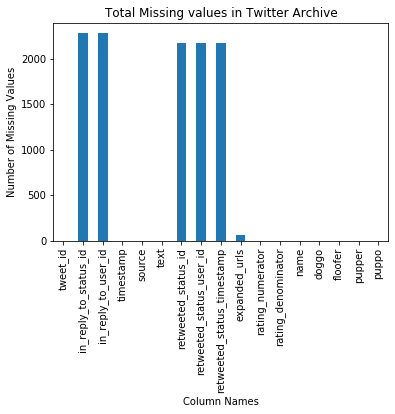

In [15]:
# Bar chart to see the columns with most missing values
ax = df_twitter.isnull().sum().plot(kind='bar')
ax.set(xlabel='Column Names', ylabel='Number of Missing Values', title= 'Total Missing values in Twitter Archive');

As we can see, there is a lot of missing data in the columns related to reply and the retweeted status. Since I only want original posts with images, I'll have to drop them later - the missing data in the "expanded_urls" column will also disappear with that cleaning operation.

In [16]:
# Checking for a random sample
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
1420,698262614669991936,NaN,NaN,2016-02-12 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He's a yoga master. Trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698262614...,11,10,Franklin,None,None,None,None
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,None,None,pupper,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
1216,714982300363173890,NaN,NaN,2016-03-30 01:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714982300...,9,10,Calbert,None,None,None,None


**Visual Assessment Observations**:

- Not all tweets can be classified as doggo, pupper or puppo and all columns contain "None"
- Source column contains unnecessary HTML code
- Name column has a value "None"

In [17]:
# Inspecting the datatypes
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Incorrect Data types**:

- tweet_id should be string instead of int64
- timestamp should be datetime instead of object (string)

In [18]:
# To check if incorrect names exist
df_twitter.name.value_counts().head(30)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
an           7
Bailey       7
Buddy        7
Daisy        7
Toby         7
Jax          6
Leo          6
Koda         6
Rusty        6
Dave         6
Jack         6
Oscar        6
Scout        6
Stanley      6
Bella        6
Milo         6
Chester      5
Name: name, dtype: int64

The dataset does contain incorrect names like *None, the, a , an*

In [19]:
df_twitter[df_twitter.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Since there are no duplicated record I'll conclude that the dataframe length corresponds to the length of unique tweet ids

In [20]:
# Making a copy of the dataframe for further assessment
df_twitter_copy = df_twitter.copy()

In [21]:
# Are any dogs with no classification

df_twitter_copy[['doggo', 'floofer','pupper','puppo']].apply(lambda x: True if(x[0]=="None"and x[1]=="None" and x[2]=="None" and x[3]=="None") else False, axis=1).value_counts()

True     1976
False     380
dtype: int64

In [22]:
380/df_twitter_copy.shape[0]

0.16129032258064516

This shows that only 16% of the data is not missing and has classification for dog stage

In [23]:
df_twitter_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Since the ratings follow a unique numbering scale, I expect values greater than 10 (denominator). But there also exists values less than 10

In [24]:
df_twitter_copy.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

The mean, median and other quartiles seem fine. But let's test at extreme values. We have a rating as high as 1776 and as low as 0. Let's also test at rating_numerator = 1

In [25]:
df_twitter_copy.query('rating_numerator == 1776').text

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

This rating seems normal

In [26]:
pd.set_option('display.max_colwidth', None)
df_twitter_copy.query('rating_numerator == 0').text

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

The 0 rating is because either the dog pictures were not clear enough or didn't contain any dogs

In [27]:
pd.set_option('display.max_colwidth', None)
df_twitter_copy.query('rating_numerator == 1').text

605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446                                           After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
1869                       What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1940                                                        The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
2038         After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
2091        Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not e

- The entry number 605 is a retweet of 2338. After manually inspecting the picture through the url, it was seen that this image is of a bird and not dog. 
- Even the entry 1869 is not a dog image
- The entry 2335 has extracted the wrong rating. The tweet text contains two numbers, but the real rating is the second number 9/10 

In [28]:
# Assessing denominators

df_twitter_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Most of the ratings have 10 as the denominator

In [29]:
df_twitter_copy.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [30]:
# Evaluate at extremes (min, max)

df_twitter_copy.query('rating_denominator == 0').text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [31]:
df_twitter_copy.query('rating_denominator == 170').text

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

- The minimum denominator 0  is the wrong extracted rating. The real rating is 13/10 and the denominator should therefore, be 10
- The maximum denominator 170 is due to presence of multiple dogs in one picture

In [32]:
# Checking for multiple dogs or occurences of pattern \d+/\d+

pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" #we could expect an integer rating

df_twitter_copy["rating"] = df_twitter_copy.text.str.extract(pattern, expand = True)[0]
df_twitter_copy[['num','denom']] = df_twitter_copy.rating.str.split('/', n=1, expand = True)

In [33]:
df_twitter_copy.rating_numerator = df_twitter_copy.rating_numerator.astype("str")
df_twitter_copy.rating_denominator = df_twitter_copy.rating_denominator.astype("str")

In [34]:
# check for differences in original and extracted numerator
df_twitter_copy['check_num'] = df_twitter_copy[['rating_numerator','num']].apply(lambda x: False if (x[0]!=x[1]) else True, axis =1)

In [35]:
df_twitter_copy.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

This shows that there are 7 occurences where the original rating numerator is not same as the extracted rating numerator

In [36]:
# Manual inspection of these 7 occurences
df_twitter_copy.query('check_num == False')[['rating_numerator', 'num', 'check_num']]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


These are the differences we found by extracting the first occurrence of the pattern. These ratings got transformed to integers and are therefore wrong. 

In [37]:
# check for differences in original and extracted denominator
df_twitter_copy['check_denom'] = df_twitter_copy[['rating_denominator','denom']].apply(lambda x: False if (x[0]!=x[1]) else True, axis =1)

In [38]:
df_twitter_copy.check_denom.value_counts()

True     2355
False       1
Name: check_denom, dtype: int64

This shows that there is only 1 occurence where the original rating denominator is not same as the extracted rating denominator

In [39]:
# Manual inspection of 1 occurence
df_twitter_copy.query("check_denom == False")[["rating_denominator", "denom","check_denom"]]

,rating_denominator,denom,check_denom
313,0,00,False


This occurence is fine

In [40]:
# checking for the count of occurences of rating pattern
df_twitter_copy['count'] = df_twitter_copy.text.str.count(pattern)

In [41]:
df_twitter_copy['count'].value_counts()

1    2323
2      32
3       1
Name: count, dtype: int64

This shows that 33 times there are more than 1 occurence of rating pattern per text

In [42]:
# Manual Confirmation of this repitition of rating pattern
df_twitter_copy.query('count != 1')[['text','count']]

,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


This data extract shows that there are:
- Presence of retweets
- Presence of multiple dogs in a picture leading to two separate ratings
- Ambiguious ratings based on presence/absence of certain characteristics

#### df_predict

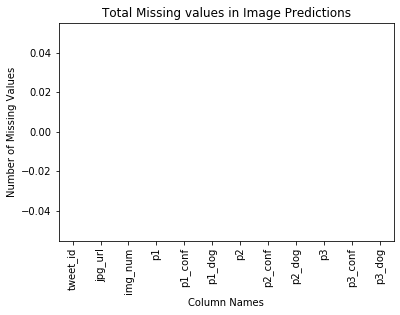

In [43]:
# Bar chart to see the columns with most missing values
ax = df_predict.isnull().sum().plot(kind='bar')
ax.set(xlabel='Column Names', ylabel='Number of Missing Values', title= 'Total Missing values in Image Predictions');

No missing data

In [44]:
# Checking a random sample 
df_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,Pomeranian,0.079883,True
1529,789268448748703744,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
1607,800513324630806528,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,1,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
1753,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,English_setter,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
1996,874680097055178752,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1,Labrador_retriever,0.836052,True,Staffordshire_bullterrier,0.047069,True,beagle,0.036007,True


Based on the sample extracted above:
- The predictions are sometimes lowercase, sometimes uppercase
- Underscore instead of whitespace between two words in predictions
- Rows with no prediction of a dog (Entry 193)

In [45]:
# Checking the datatypes
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The tweet_id column should be string instead of int64

In [46]:
# Checking for presence of retweets in the dataframe
df_predict.jpg_url.duplicated().sum()

66

Here, presence of retweets is checked if there are duplicate jpg urls. This dataset consists of 66 duplicates/retweets

In [47]:
df_predict.tweet_id.duplicated().sum()

0

Here, presence of duplicates are checked by checking if the unique tweet ids are repeated. There are no duplicates in this dataset

In [48]:
df_predict[['p1_dog', 'p2_dog', 'p3_dog']].apply(lambda x: True if (x[0]==False and x[1] == False and x[2]== False) else False, axis= 1).value_counts()

False    1751
True      324
dtype: int64

There are 324 occurences with no image predictions

**df_api**

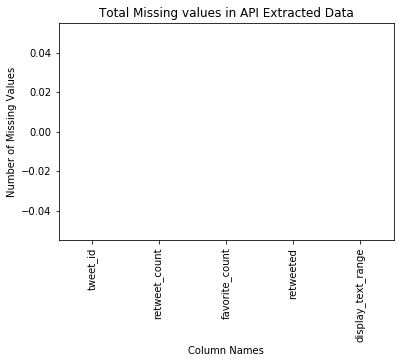

In [49]:
# Bar chart to see the columns with most missing values
ax = df_api.isnull().sum().plot(kind='bar')
ax.set(xlabel='Column Names', ylabel='Number of Missing Values', title= 'Total Missing values in API Extracted Data');

No missing data

In [50]:
# Checking a random sample 
df_api.sample(10)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
412,821149554670182400,2028,8791,False,"[0, 62]"
111,870374049280663552,24605,78748,False,"[0, 139]"
1864,674774481756377088,454,1085,False,"[0, 139]"
1862,674788554665512960,203,796,False,"[0, 128]"
2216,667915453470232577,54,199,False,"[0, 138]"
1774,677187300187611136,906,2709,False,"[0, 139]"
1478,692041934689402880,1273,3399,False,"[0, 86]"
437,818588835076603904,6275,0,False,"[0, 107]"
2240,667534815156183040,498,788,False,"[0, 140]"
388,824025158776213504,605,4891,False,"[0, 44]"


In [51]:
# Checking the datatypes
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   retweeted           2331 non-null   bool  
 4   display_text_range  2331 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


Tweet id should be string instead of null

<a id='assessingsum'></a>
## Assessing Summary

### Data Quality Issues (Content)

##### `df_twitter` table
- Datatype of `tweet_id` is integer and should be string
- Datatype of `timestamp` is object and should be datetime
- Some of the dogs are not classified in one of the stages: `doggo, floofer, pupper or puppo` and contain the value "None" under these columns
- Some of the dog names are incorrect (None, an, by, a, ...)
- Presence of retweets
- Some of the ratings are not correctly extracted (mostly if there are >1  occurence of the pattern "(\d+(\.\d+)?\/\d+(\.\d+)?)")
- Mistakes due to transformation of ratings to integer (there are also floats)
- `Source` contains html code

##### `df_predict` table
- Datatype of `tweet_id` is integer and should be string
- Presence of retweets (duplicated rows in column `jpg_url`)
- Presence of pictures that are not dogs
- Predictions are sometimes uppercase, sometimes lowercase
- "_" instead of a whitespace in the predictions

##### `df_api` table
- Datatype of `tweet_id` is integer and should be string



### Data Tidiness Issues (Structural)

##### `df_twitter` table
- `doggo`, `floofer`,`pupper` and `puppo` are not easy to analyze and should be in one column under `dog_stage`

##### `df_predict` table
- Prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

##### `df_api` table
- `display_text_range` contains 2 variables

##### `All` tables (Master Dataset)

- All three tables share the column `tweet_id` and should be merged together

<a id='cleaning'></a>
## Data Cleaning

Cleaning steps:
1. Merge the tables together
2. Drop the `replies, retweets` and corresponding columns. Also drop the tweets without an image or with images which don't display dogs
3. Clean the datatypes of the columns
4. Clean the wrong ratings numerators
     - Replace float values 
     - Drop multiple occurences of patterns
5. Extract the source from html code
6. Split the `display_text_range` into two separate columns
7. Transform the `doggo`, `floofer`, `pupper` and `puppo` columns into one column namely `dog_stage`
8. Remove the incorrect names in the  `name` column
9. Reduce the prediction columns into two: Most likely `breed` and corresponding `confidence`
10. Clean the new `breed` column by replacing the "_" with a whitespace and convert to lowercase

**1. Merge the tables together**

Merging is the ideal first step here since the tables utilized here share a lot of common cleaning steps. Moreover some sofisticated cleaning steps like removing retweets or the rows with no dog classification and/or image predictions are dependent operations. This also saves computation time and avoids repitition leading to an optimised code

In [52]:
# Outer join to include all rows in all tables

df_master = pd.merge(df_twitter, df_api, on="tweet_id", how="outer")
df_master = pd.merge(df_master, df_predict, on="tweet_id", how="outer")

In [53]:
# Check for success
df_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [54]:
# Check for all the column names
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**2. Drop the replies, retweets and corresponding columns. Also drop the tweets without an image or with images that don't display dogs**

In this section, I'll clean the dataset to only have the original tweets and the originals tweets which have a dog classification and image prediction.

This section will follow 5 sub-steps
- Remove retweets
- Remove rows with NAs in retweeted 
- Remove unnecessary columns 
- Remove rows with no jpg_url as these have no image predictions
- Remove rows with no dog classification

In [55]:
# Create a copy pf the master dataset
df_master_clean = df_master.copy()

Visualizing the missing data

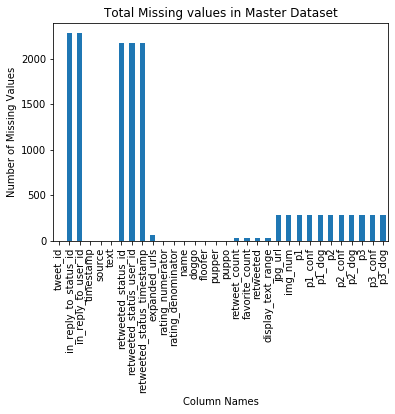

In [56]:
# Bar chart to see the columns with missing values
ax = df_master_clean.isnull().sum().plot(kind='bar')
ax.set(xlabel='Column Names', ylabel='Number of Missing Values', title= 'Total Missing values in Master Dataset');

**Remove retweets**

In [57]:
# Keeping rows without an entry in "retweeted_status_id" 
df_master_clean = df_master_clean[df_master_clean["retweeted_status_id"].isnull()]

In [58]:
# Keeping rows without an entry in "in_reply_to_status_id"
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

In [59]:
# Check if the retweeted column only includes the value False
df_master_clean.retweeted.value_counts()

False    2090
Name: retweeted, dtype: int64

**Remove rows with NAs in retweeted**

While extracting additional data from API, some data was deleted and hence those values are filled with NAs. 

In [60]:
df_master_clean.dropna(subset = ['retweeted'], inplace=True)

**Remove unneccessary columns**

In [61]:
# Drop the unnecessary columns
df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp", "retweeted"], inplace=True, axis = 1)

**Remove rows with no jpg_url as these have no image predictions**

Jpg urls with NAs mean that there were no image predictions for that corresponding tweet ids. This could also be the case if there are retweets

In [62]:
df_master_clean.dropna(subset= ['jpg_url'], inplace=True)

In [63]:
# Check for duplicated images (as there are no retweets now)
sum(df_master_clean.jpg_url.duplicated())

0

**Remove rows with no dog classification**

This is the case where there is a False value for all the 3 columns of `p1_dog`, `p2_dog`, `p3_dog`

In [64]:
df_master_clean.drop(df_master_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

In [65]:
# Check for success
df_master_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


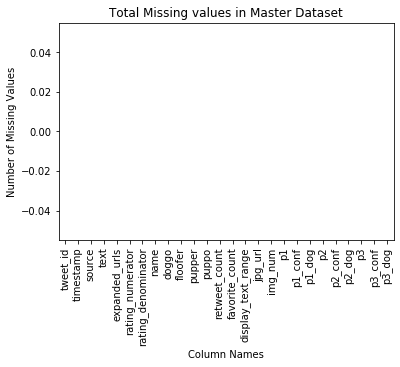

In [66]:
# Visual Confimration using Bar chart to see the columns with missing values
ax = df_master_clean.isnull().sum().plot(kind='bar')
ax.set(xlabel='Column Names', ylabel='Number of Missing Values', title= 'Total Missing values in Master Dataset');

**3. Clean the datatypes of the columns**

The following datatypes need to be changed
- tweet_id (int to str)
- timestamp (str to datetime)
- retweet_count, favorite_count, img_num (float to int)

In [67]:
# Changing datatype of tweet_id

df_master_clean['tweet_id'] = df_master_clean.tweet_id.astype('str')

In [68]:
# Changing datatype of timestamp

df_master_clean['timestamp'] = pd.to_datetime(df_master_clean.timestamp)

In [69]:
# Changing datatype of retweet_count, favorite_count, img_num

for x in ['retweet_count', 'favorite_count', 'img_num']:
    df_master_clean[x] = df_master_clean[x].astype('int64')

In [70]:
# Check for success

df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1659 non-null   object             
 1   timestamp           1659 non-null   datetime64[ns, UTC]
 2   source              1659 non-null   object             
 3   text                1659 non-null   object             
 4   expanded_urls       1659 non-null   object             
 5   rating_numerator    1659 non-null   int64              
 6   rating_denominator  1659 non-null   int64              
 7   name                1659 non-null   object             
 8   doggo               1659 non-null   object             
 9   floofer             1659 non-null   object             
 10  pupper              1659 non-null   object             
 11  puppo               1659 non-null   object             
 12  retweet_count       1659 non-null 

**4. Clean the wrong ratings numerators**
- Replace float values
- Drop multiple occurences of patterns

While programmatically assessing the ratings numerator, I observed that since these column has integer datatype, the float values were extracted wrong. For example, 13.5 is extracted as 5

In [71]:
# Checking the previous check_num column calculated
df_twitter_copy.query('check_num == False')[['rating_numerator', 'num', 'check_num']]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


Since I have dropped certain rows in the previous cleaning step. Extracting the difference in pattern again

In [72]:
# Extract pattern

pattern = "(\d+\.\d+\/\d+)"
df_master_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [73]:
# Extract numerator from the rating

df_num_clean = df_master_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand = True)[0]

In [74]:
df_num_clean

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [75]:
# Get the index of the wrong data
df_num_clean_indexes = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype('float64')

In [76]:
# Changing the data type of original columns in master data
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype('float64')
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype('float64')

# Imputing the data
df_master_clean.loc[df_num_clean_indexes, 'rating_numerator'] = df_num_clean_values

In [77]:
# Check for success
df_master_clean.loc[df_num_clean_indexes].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

Dropping multiple occurences of the pattern.

In [78]:
# Pattern
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

# Pattern Count greater than 1
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern)!=1])

# Get the index for pattern count greater than 1
pattern_clean_index = df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern)!=1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [79]:
# Dropping rows with pattern count greater than 1
df_master_clean.drop(pattern_clean_index, inplace = True)

In [80]:
# Check for success
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


**5. Extract the source from html code**

- The column specifies the source of the tweet but contains html which makes it difficult to identify sources

In [81]:
df_master_clean.iloc[:2,:3]

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [82]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
df_master_clean.source = df_master_clean.source.str.extract("\>(.*?)\<", expand = True)

In [83]:
# Check for success
df_master_clean.iloc[:2,:3]

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone


In [84]:
df_master_clean.source.value_counts()

Twitter for iPhone    1605
Twitter Web Client      20
TweetDeck                8
Name: source, dtype: int64

**6. Split the display_text_range into two separate columns**

Since the display_text_range is interpreted as a list, I can simply split it using list indexing

In [85]:
# Get the lower text range at list index 0
df_master_clean['lower_text_range'] = df_master_clean.display_text_range.apply(lambda x: x[0])

# Get the upper text range at list index 1
df_master_clean['upper_text_range'] = df_master_clean.display_text_range.apply(lambda x: x[1])

# Drop the display_text_range column
df_master_clean.drop('display_text_range', axis = 1, inplace = True)

In [86]:
# Check for success
df_master_clean[['lower_text_range','upper_text_range']].head()

,lower_text_range,upper_text_range
1,0,138
2,0,121
3,0,79
4,0,138
5,0,138


**7. Transform the doggo, floofer, pupper and puppo columns into one column namely dog_stage**

To improve the structural quality of the dataset and augment the analysis step, I have transformed these individual dog stage columns under one column namely, `dog_stage`. First, all "None" values need to replaced by "" to combine these columns which later will be replace by np.nan and easily excluded during analysis.

In [87]:
# Replace None value with "" in the individual columns
for x in ["doggo", "floofer", "pupper", "puppo"]: 
    df_master_clean[x].replace("None", "", inplace = True)
    
# Combining individual columns into new column
#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
#concat the columns together
df_master_clean['dog_stage'] = df_master_clean['doggo'].map(str) + df_master_clean[
    'floofer'].map(str) + df_master_clean['pupper'].map(str) + df_master_clean['puppo'].map(str)

In [88]:
# Check for success
df_master_clean['dog_stage'].value_counts()

                1379
pupper           164
doggo             53
puppo             21
doggopupper        7
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [89]:
#replace the leftover "" with np.nan
df_master_clean["dog_stage"].replace("", np.nan, inplace = True)

In [90]:
# Check for success
df_master_clean.dog_stage.value_counts() 

pupper          164
doggo            53
puppo            21
doggopupper       7
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [91]:
# Count the occurrences of the pattern and show the rows with count > 1
df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

There are multiple dog stage classfications in a text. Extracting them to check for differences

In [92]:
# Extract the first dog stage in the text column
df_master_clean["dog_stage_re"] = df_master_clean.text.str.extract(
    r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [93]:
# Fnd the differences of the extract
df_master_clean[["text","dog_stage", "dog_stage_re"]].dropna(subset = ["dog_stage_re"]).query("dog_stage != dog_stage_re")

,text,dog_stage,dog_stage_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo


There are 8 occurences of differences between original dog stage and newly extracted dog stage. After reading the individual text the differences are because of:
- Correcting the former classification in later text
- Presence of multiple dogs
- No dog in picture
- Comparison with another stage before classification of stage

Manually correcting the above and replacing the text with multiple dogs or no dog as np.nan

In [94]:
# 191 - Puppo
# 200 - No dog (Owl)
# 531 - Multiple Dogs
# 575 - Pupper
# 889 - Multiple Dogs
# 956 - No dog (Background)
# 1063 - Multiple Dogs
# 1113 - Multiple Dogs

df_master_clean.loc[191, 'dog_stage'] = "puppo"
df_master_clean.loc[200, "dog_stage"] = np.nan
df_master_clean.loc[531, "dog_stage"] = np.nan
df_master_clean.loc[575, "dog_stage"] = "pupper"
df_master_clean.loc[889, "dog_stage"] = np.nan
df_master_clean.loc[956, "dog_stage"] = np.nan
df_master_clean.loc[1063, "dog_stage"] = np.nan
df_master_clean.loc[1113, "dog_stage"] = np.nan

In [95]:
# Check for success
df_master_clean[['text','dog_stage','dog_stage_re']].dropna(subset = ["dog_stage_re"]).query('dog_stage != dog_stage_re')

,text,dog_stage,dog_stage_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


In [96]:
# Drop the individual columns and dog_stage_re
df_master_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_stage_re"], inplace = True, axis = 1)

In [97]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   object             
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1633 non-null   object             
 8   retweet_count       1633 non-null   int64              
 9   favorite_count      1633 non-null   int64              
 10  jpg_url             1633 non-null   object             
 11  img_num             1633 non-null   int64              
 12  p1                  1633 non-null 

**8. Remove the incorrect names in the name column**

Replacing the incorrect names with np.nan

In [98]:
for x in ["None", "a", "an", "by", "the"]:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

In [99]:
# Check for success
df_master_clean.name.value_counts()

Cooper     10
Oliver      9
Tucker      9
Lucy        9
Charlie     9
           ..
Ralphé      1
Erik        1
Kaia        1
Jerome      1
Lambeau     1
Name: name, Length: 832, dtype: int64

**9. Reduce the prediction columns into two: Mostly likely breed and corresponding confidence**

In this dataset there are there predictions for the dogs, namely, p1, p2 and p3. Each of these predictions is supported by a confidence p1_conf, p2_conf and p3_conf. A general trend is p1_conf > p2_conf > p3_conf. So these columns are sorted by confidence. There are also 3 bool variables, p1_dog, p2_dog or p3_dog which hold True if p1, p2 or p3 are dog pictures.

In [100]:
# Check for the sorting of confidence intervals
df_master_clean.query('p2_conf > p1_conf')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_stage


In [101]:
# Check for the sorting of confidence intervals
df_master_clean.query('p3_conf > p1_conf')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_stage


In [102]:
# Check for the sorting of confidence intervals
df_master_clean.query('p3_conf > p2_conf')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_stage


In [103]:
# Extract the most likely prediction

def get_attr(x):
    if x[0] == True:
        return x[1]
    if x[2] == True:
        return x[3]
    else:
        return x[4]

df_master_clean['breed'] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis=1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [104]:
# Check for success
df_master_clean.iloc[:, 12: ]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_stage,breed,conf
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0,138,NaN,Chihuahua,0.323581
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0,121,NaN,Chihuahua,0.716012
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,79,NaN,Labrador_retriever,0.168086
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,138,NaN,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,138,NaN,Chesapeake_Bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0,120,NaN,miniature_pinscher,0.560311
2352,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0,137,NaN,Rhodesian_ridgeback,0.408143
2353,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0,130,NaN,German_shepherd,0.596461
2354,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0,139,NaN,redbone,0.506826


In [105]:
# Drop the reduced columns
df_master_clean.drop(df_master_clean.columns[12:21], inplace = True, axis = 1)

In [106]:
# Check for success
df_master_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_stage,breed,conf
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5720,31305,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3785,23578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,7889,39616,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,Labrador_retriever,0.168086


**10. Clean the new breed column by replacing the "_" with a whitespace and convert to lowercase**

Here we address the data quality dimension of consistency within the new breed column

In [107]:
# Replace "_" with ""
df_master_clean.breed = df_master_clean.breed.str.replace("_"," ")

In [108]:
# Convert to lowercase
df_master_clean.breed = df_master_clean.breed.str.lower()

In [109]:
# Check for success
df_master_clean.breed.value_counts()

golden retriever        154
labrador retriever      103
pembroke                 93
chihuahua                87
pug                      62
                       ... 
bouvier des flandres      1
irish wolfhound           1
standard schnauzer        1
entlebucher               1
australian terrier        1
Name: breed, Length: 113, dtype: int64

In [110]:
# Reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

In [111]:
# Check for success
df_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_stage,breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5720,31305,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3785,23578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,7889,39616,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8508,37822,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,2851,19048,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,chesapeake bay retriever,0.425595


In [112]:
#save the data to a *.csv file
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Data Analysis

This section consists of insights on the dataset gathered, assessed and cleaned above. Below are the questions on which this analysis section is focused

**Questions:**

1. Which breed is the most popular among WeRateDogs tweets and retweets?
2. How is the account activity throughout the time period available in the dataset? 
3. What are the most active hours for the twitter account? 
4. Which is the most common source used to post the tweets?

### 1. Which breed is the most popular among WeRateDogs tweets and retweets?

I have answered this question based on individual and aggregated values for the following:
- Retweet counts and favourite counts
- Ratings

In [113]:
# Read the master dataset
df = pd.read_csv("twitter_archive_master.csv")

In [114]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_stage,breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5720,31305,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3785,23578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,7889,39616,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8508,37822,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,2851,19048,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,chesapeake bay retriever,0.425595


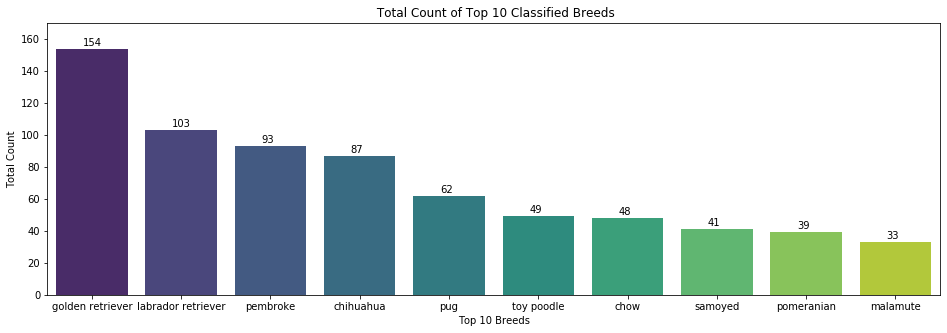

In [115]:
# Distribution of Breeds in the dataset

#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "breed", data = df, order = df.breed.value_counts().iloc[:10].index, palette = "viridis")
ax.set_title(" Total Count of Top 10 Classified Breeds");

ax.set_ylim(0, 170)
ax.set(xlabel='Top 10 Breeds', ylabel='Total Count')
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

**The distribution shows that the images in the dataset are mostly of Golden retrievers with a count of 154 and Labrador retrievers with a count of 103**

In [116]:
# Aggregation of retweet and favorite count

df_breed = df.groupby('breed', as_index = False)[["retweet_count", "favorite_count", "breed"]].sum()

In [117]:
# Sorting by retweet count

df_breed.sort_values("retweet_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
45,golden retriever,506415,1767829
62,labrador retriever,348056,1124415
80,pembroke,258818,970687
27,chihuahua,213283,680416
88,samoyed,170817,517971
41,french bulldog,144587,563510
30,cocker spaniel,127492,368771
28,chow,117751,419628
82,pug,103875,350980
81,pomeranian,99863,294853


In [118]:
# Sorting by favorite count

df_breed.sort_values("favorite_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
45,golden retriever,506415,1767829
62,labrador retriever,348056,1124415
80,pembroke,258818,970687
27,chihuahua,213283,680416
41,french bulldog,144587,563510
88,samoyed,170817,517971
28,chow,117751,419628
30,cocker spaniel,127492,368771
82,pug,103875,350980
66,malamute,97085,328269


Aggregating by individual sum of retweet count and favorite count we can conclude that the top two are: Golden retrievers and Labrador retrievers

In [119]:
# Taking sum of retweet and favorite count
df_breed["sum"] = df_breed["retweet_count"] + df_breed["favorite_count"]

In [120]:
# Sorting by the sum
df_breed.sort_values("sum", ascending = False).head(10)

,breed,retweet_count,favorite_count,sum
45,golden retriever,506415,1767829,2274244
62,labrador retriever,348056,1124415,1472471
80,pembroke,258818,970687,1229505
27,chihuahua,213283,680416,893699
41,french bulldog,144587,563510,708097
88,samoyed,170817,517971,688788
28,chow,117751,419628,537379
30,cocker spaniel,127492,368771,496263
82,pug,103875,350980,454855
66,malamute,97085,328269,425354


[Text(0, 0.5, 'Sum of favorite and retweet counts'), Text(0.5, 0, 'Breeds')]

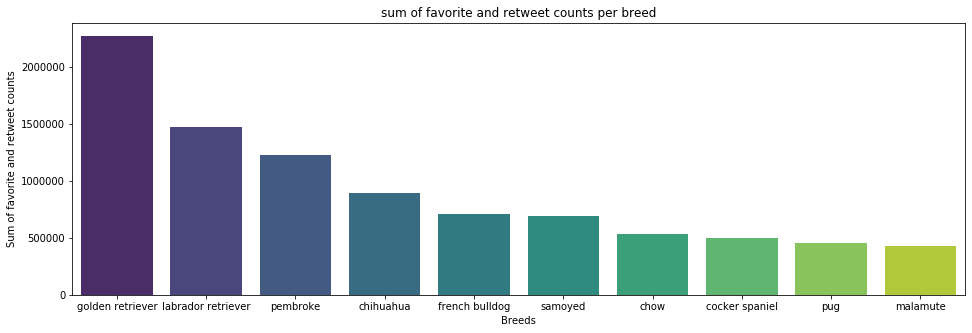

In [121]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "breed", y = "sum", data = df_breed.sort_values("sum", ascending=False).iloc[:10], palette = "viridis")
ax.set_title("sum of favorite and retweet counts per breed");
ax.set(xlabel='Breeds', ylabel='Sum of favorite and retweet counts')

**Based on the sum of retweets and favorite counts, the top two are still: Golden retrievers and Labrador retrievers**

In [122]:
# Checking individual values for the retweet count to see most retweeted post breed
df[["retweet_count", "favorite_count", "breed"]].sort_values("retweet_count", ascending = False).head(5)

,retweet_count,favorite_count,breed
678,78100,156721,labrador retriever
705,57886,115726,eskimo dog
356,56944,121040,chihuahua
271,43994,133471,lakeland terrier
53,40723,99555,english springer


In [123]:
# Checking individual values for the favorite count to see most favorite post breed
df[["retweet_count", "favorite_count", "breed"]].sort_values("favorite_count", ascending = False).head(5)

,retweet_count,favorite_count,breed
678,78100,156721,labrador retriever
271,43994,133471,lakeland terrier
356,56944,121040,chihuahua
99,33065,116745,french bulldog
705,57886,115726,eskimo dog


**In both cases, the top 5 retweeted and top 5 favorite counts, Labrador Retriever is the highest and Golden Retriever is not in the list**

In [124]:
# Aggregating by average ratings
df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

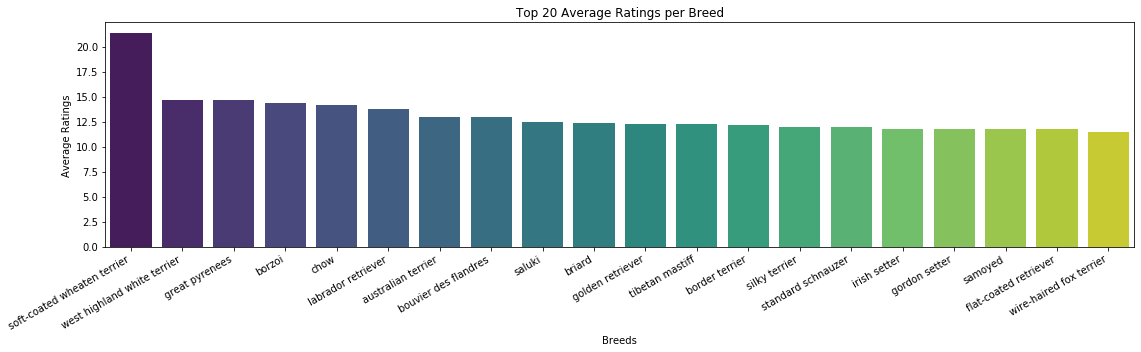

In [125]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "breed", y = "rating_numerator", data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:20], palette = "viridis")
ax.set_title("Top 20 Average Ratings per Breed");
ax.set(xlabel='Breeds', ylabel='Average Ratings')
#https://code.i-harness.com/de/q/2135a8
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

In [126]:
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(10)

,breed,rating_numerator
96,soft-coated wheaten terrier,21.357143
109,west highland white terrier,14.687500
48,great pyrenees,14.666667
16,borzoi,14.333333
28,chow,14.166667
62,labrador retriever,13.728155
4,australian terrier,13.000000
18,bouvier des flandres,13.000000
87,saluki,12.500000
21,briard,12.333333


**Most breeds follow a similar average range of ratings with an outlier of soft-coated wheaten terrier with a very high average rating of 21.35. To check this is not by chance we see the total number of soft-coated wheaten terrier dogs and the highest rating received by this breed.**

In [127]:
# Checking the top 5 ratings
df[["breed", "rating_numerator"]].sort_values("rating_numerator", ascending = False).head(5)

,breed,rating_numerator
583,labrador retriever,165.0
1222,chow,144.0
1116,soft-coated wheaten terrier,121.0
823,golden retriever,99.0
1269,labrador retriever,88.0


**Soft-coated wheaten terrier has not received the highest rating. The highest rating is received by the Labrador Retriever breed with a rating of 165**

In [128]:
# Number of images of Labrador Retriever 
len(df.query("breed == 'labrador retriever'"))

0

In [129]:
# Number of images of soft-coated wheaten terrier
len(df.query("breed == 'soft-coated wheaten terrier'"))

0

In [130]:
df.query("breed != 'soft-coated wheaten terrier'").rating_numerator.mean()

11.348303735456215

**Insights:**
- Since there are a lot more tweets with labrador retriever than for the soft-coated wheaten terrier, the one big rating of the soft-coated wheaten terrier has a higher weight than the one of the labrador retriever (14 tweets of soft-coated wheaten terrier and 103 of labrador retriever).
- Not taking the outlier into account, this leads us to an average rating of 11. Based on the number of posts, retweets, favorites and mean rating, **the title of "Most overall liked dog of this Twitter account and its community" should be given to the labrador retriever.**

### 2. How is the account activity throughout the time period available in the dataset?

I am going to analyse the account activity based on the following parameters:
- Popular day of the week
- Popular month
- Popular month-year
- Retweet count
- Favorite count
- Number of uploaded images
- Tweet text length

In [131]:
df_time = df.copy()

In [132]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1633 non-null   int64  
 1   timestamp           1633 non-null   object 
 2   source              1633 non-null   object 
 3   text                1633 non-null   object 
 4   expanded_urls       1633 non-null   object 
 5   rating_numerator    1633 non-null   float64
 6   rating_denominator  1633 non-null   float64
 7   name                1187 non-null   object 
 8   retweet_count       1633 non-null   int64  
 9   favorite_count      1633 non-null   int64  
 10  jpg_url             1633 non-null   object 
 11  img_num             1633 non-null   int64  
 12  lower_text_range    1633 non-null   int64  
 13  upper_text_range    1633 non-null   int64  
 14  dog_stage           248 non-null    object 
 15  breed               1633 non-null   object 
 16  conf  

In [133]:
# Converting timestamp to datetime again
df_time['timestamp'] = pd.to_datetime(df_time['timestamp'])

In [134]:
# Day of the week
df_time['dow'] = df_time['timestamp'].apply(lambda x: x.dayofweek)

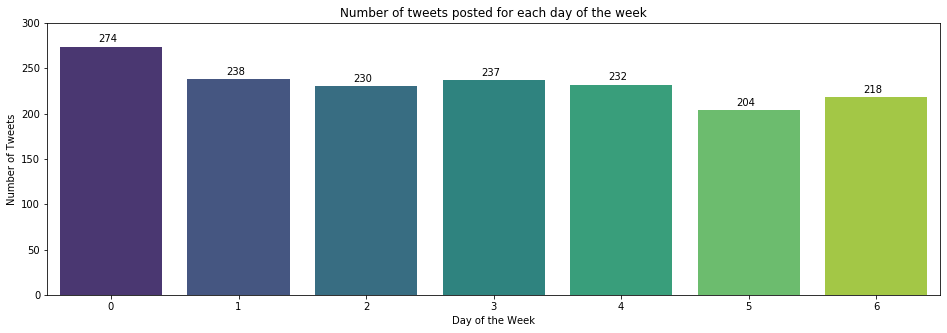

In [135]:
fig, ax = plt.subplots(figsize = (16,5))

ax = sns.countplot(x = "dow", data = df_time, palette = "viridis")
ax.set_title("Number of tweets posted for each day of the week");
ax.set(xlabel='Day of the Week', ylabel='Number of Tweets')
ax.set_ylim(0, 300)

#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

**This plot shows that** 
- Most tweets have been posted on Monday
- Constant number of tweet from Tuesday through Friday
- Weekends show comparatively lower tweets posted

In [136]:
# Starting date of posting in this dataset
df_time.timestamp.min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [137]:
# Last date of posting in this dataset
df_time.timestamp.max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

This states that we have data present from November 2015 to August 2017. We have a whole year data for 2016.

In [138]:
# Extract month
df_time['month'] = df_time['timestamp'].apply(lambda x: x.month)

# Extract year
df_time['year'] = df_time['timestamp'].apply(lambda x: x.year)

# Extract hour
df_time['hour'] = df_time['timestamp'].apply(lambda x: x.hour)

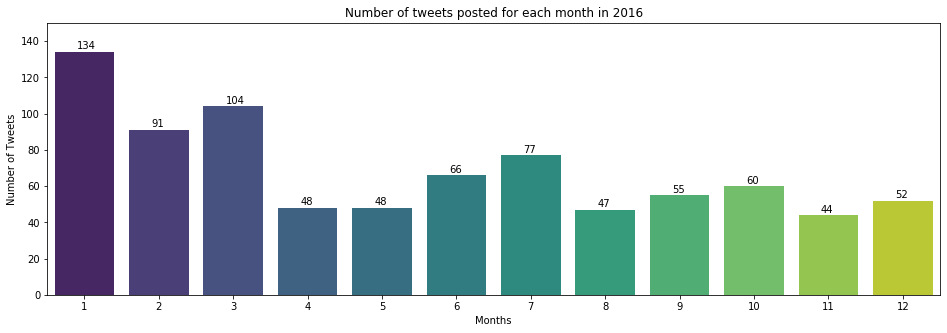

In [139]:
# Analysing the months in 2016
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "month", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("Number of tweets posted for each month in 2016");
ax.set(xlabel='Months', ylabel='Number of Tweets')
ax.set_ylim(0,150)

#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))

**Insights:**
In the year 2016, most tweets were posted in the month of January (134). The overall tweets posted in 2016 is showing a declining trend. This might suggest that maybe twitter users stopped sending in dog images to rate or the account reduced the amounts of ratings given towards the end of the year.

In [140]:
# Month and Year
#https://erikrood.com/Python_References/extract_month_year_pandas_final.html
df_time['month_year'] = pd.to_datetime(df["timestamp"]).dt.to_period('M')

C:\Users\Maithili\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


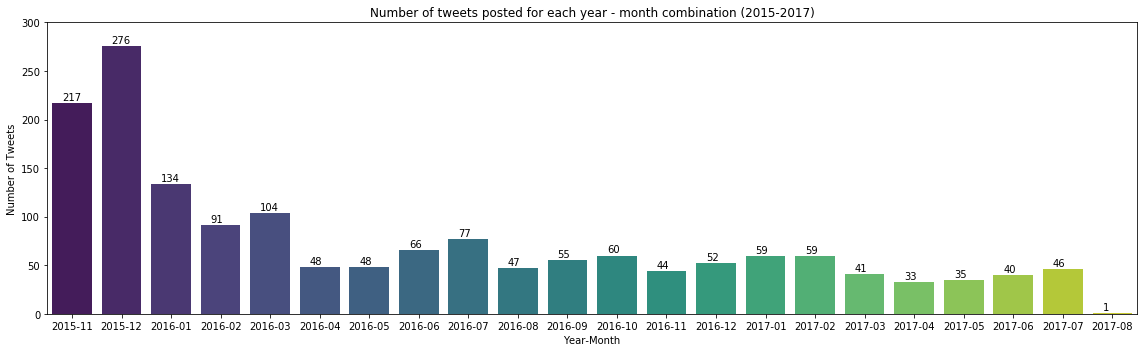

In [141]:
# Plot for year-month from 2015-2017
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "month_year", data = df_time.sort_values("month_year"), palette = "viridis", )
ax.set_title("Number of tweets posted for each year - month combination (2015-2017)");
ax.set(xlabel='Year-Month', ylabel='Number of Tweets')
ax.set_ylim(0, 300)

#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

plt.tight_layout()

**Insights:** Looking at the entire time period from 2015 to 2017, the declining trend in tweets is clearer. In April 2016, the number of tweets posted dropped and since then it has been relatively constant. To see if the performance of the Account has decreased I will take a look further on the favorites and retweets that the posts get.

In [142]:
df_time_groupby = df_time.groupby("month_year", as_index = False).sum()

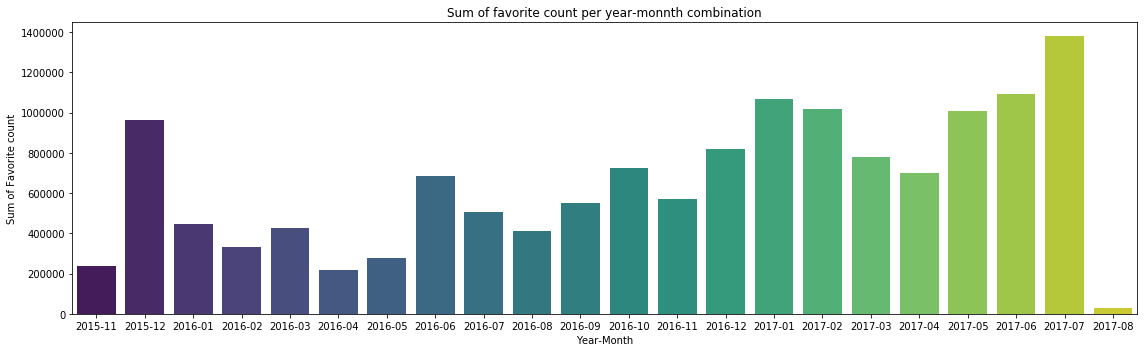

In [143]:
# Plot for the sum of Favorite count for each year-month
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby, palette = "viridis")
ax.set_title("Sum of favorite count per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Sum of Favorite count')


plt.tight_layout()

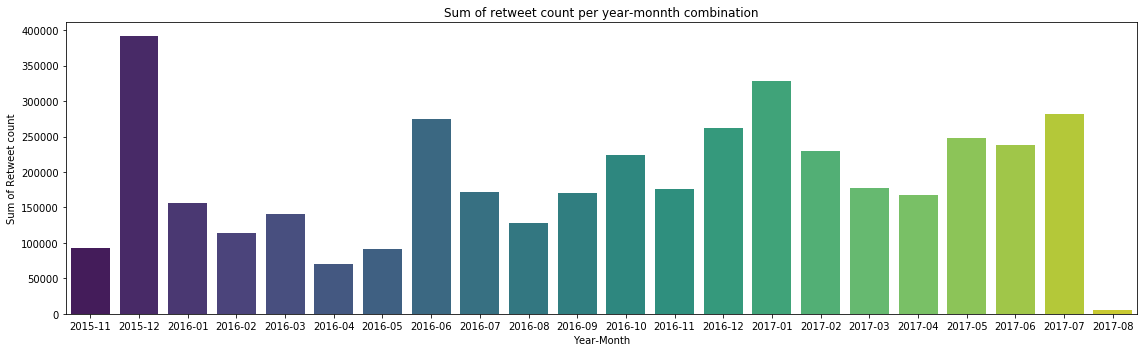

In [144]:
# Plot for the sum of Retweet count for each year-month
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby, palette = "viridis")
ax.set_title("Sum of retweet count per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Sum of Retweet count')

plt.tight_layout()

**Insights:** Though the number of tweets posted per month are decreasing, the count for retweets and favorites is increasing. 

In [145]:
# Groupby object over the mean
df_time_groupby_mean = df_time.groupby("month_year", as_index = False).mean()

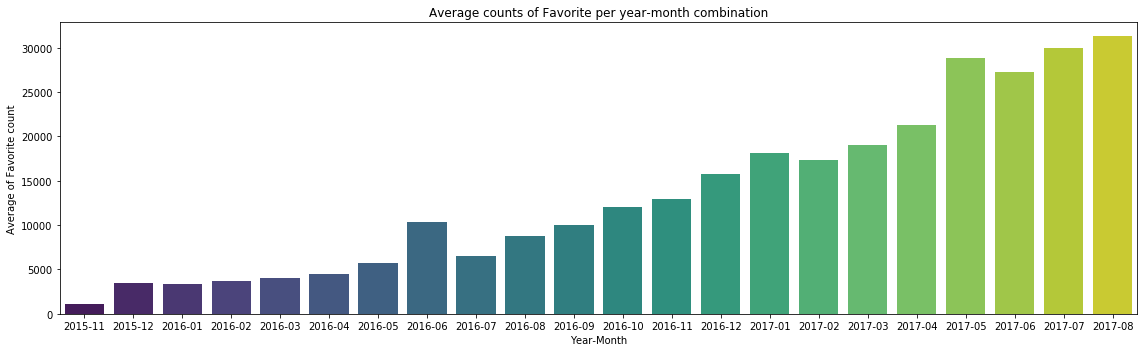

In [146]:
# Plot for the average count of Favorite for each year-month
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("Average Favorite counts per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Average of Favorite count')


plt.tight_layout()

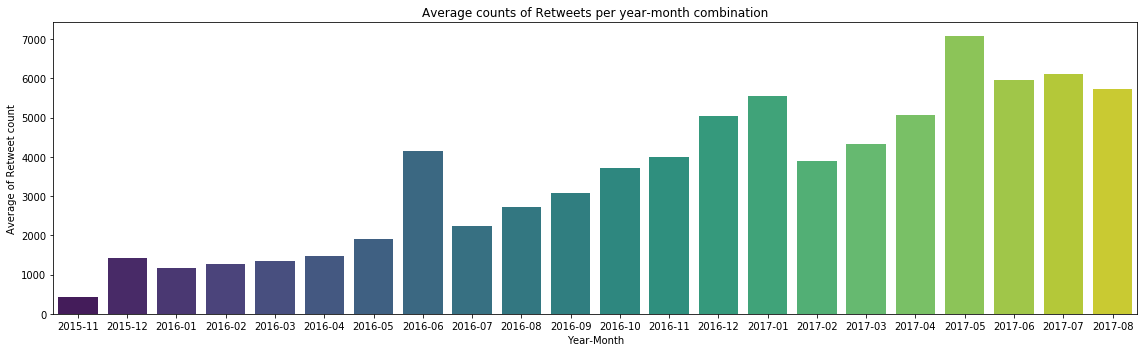

In [147]:
# Plot for the average count of Retweets for each year-month
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("Average Retweets counts per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Average of Retweet count')

plt.tight_layout()

**Insights:**
- By taking the average of the counts of favorite and retweets the uptrend becomes even clearer than before. 
- Now since retweets and favorite counts are not the reasons for low profile activity of tweets posted we will check the images posted per month and the average of the upper text range.

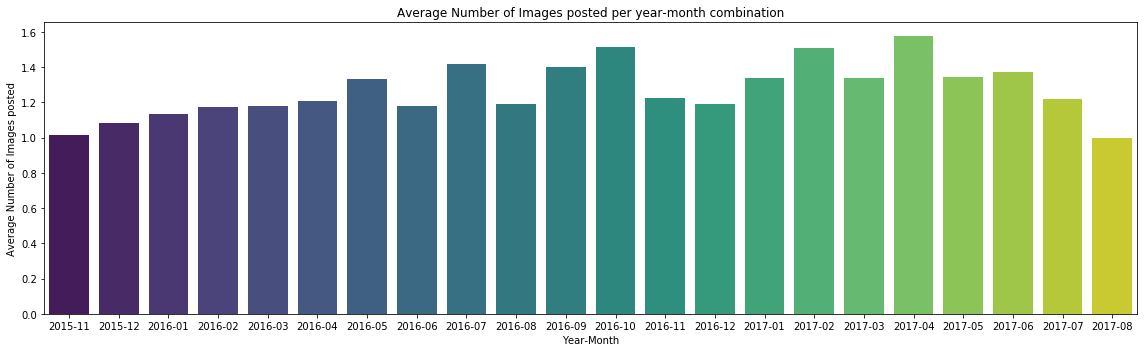

In [148]:
# Plot for number of images posted
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "img_num", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("Average Number of Images posted per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Average Number of Images posted')

plt.tight_layout()

**Insights:** The number of images posted seem pretty stable. There are months where there are more and months where there are less posted images, but overall there is no clear uptrend or downtrend visible.

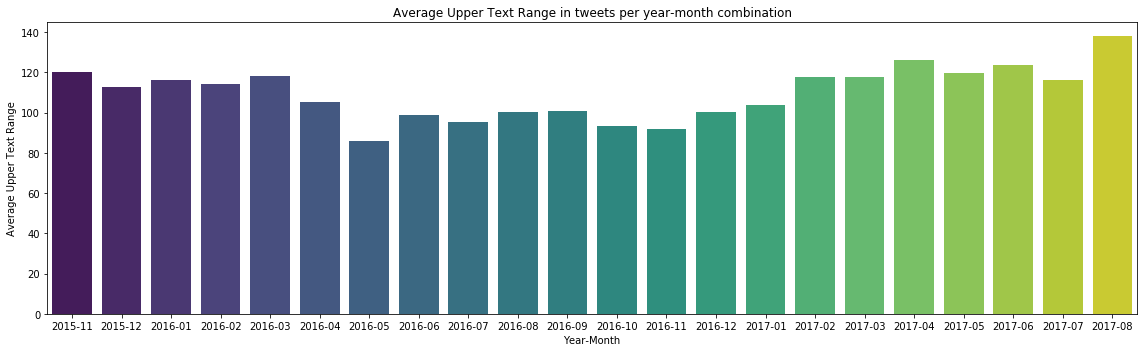

In [149]:
# Plot for upper text range
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "upper_text_range", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("Average Upper Text Range in tweets per year-month combination");
ax.set(xlabel='Year-Month', ylabel='Average Upper Text Range')

plt.tight_layout()

In [150]:
# Average Upper Text Range over entire time period of 21 year-month combination
df_time_groupby_mean.upper_text_range.mean()

109.8499773989006

In [151]:
# Average Upper Text Range over first 11 year-month combination
df_time_groupby_mean.iloc[:11].upper_text_range.mean()

106.16802606196683

In [152]:
# Average Upper Text Range over last 11 year-month combination
df_time_groupby_mean.iloc[11:].upper_text_range.mean()

113.53192873583444

The tweet length seems to have increased over the second half of the dataset from an average of 106 to 113.

### 3. What are the most active hours for the twitter account?

[Text(0, 0.5, 'Number of Tweets'), Text(0.5, 0, 'Hours')]

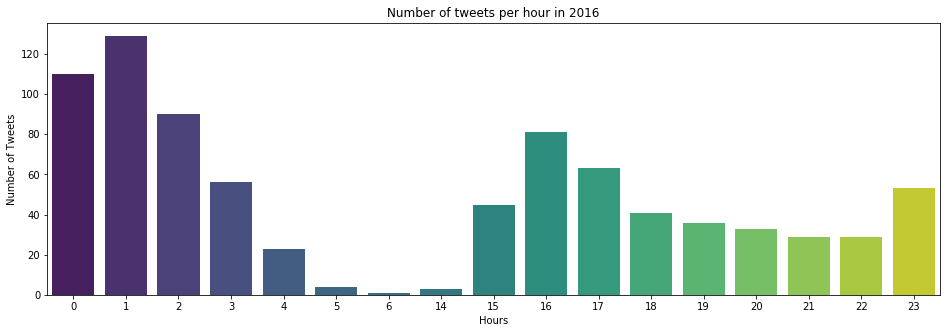

In [153]:
# Plot for tweets per hour in the year 2016
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("Number of tweets per hour in 2016");
ax.set(xlabel='Hours', ylabel='Number of Tweets')

[Text(0, 0.5, 'Number of Tweets'), Text(0.5, 0, 'Hours')]

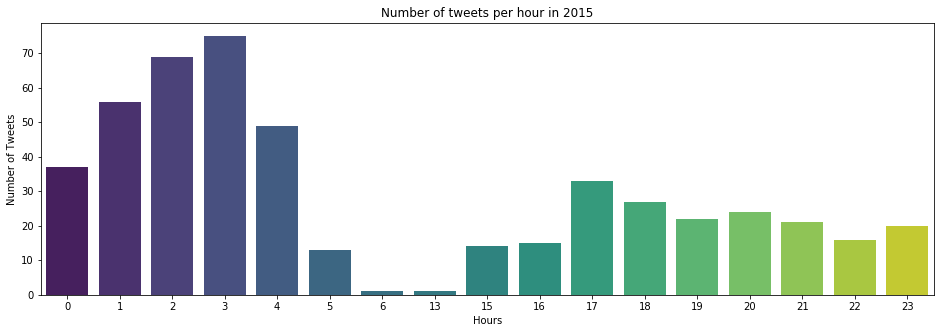

In [154]:
# Plot for tweets per hour in the year 2015
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2015"), palette = "viridis")
ax.set_title("Number of tweets per hour in 2015");
ax.set(xlabel='Hours', ylabel='Number of Tweets')

[Text(0, 0.5, 'Number of Tweets'), Text(0.5, 0, 'Hours')]

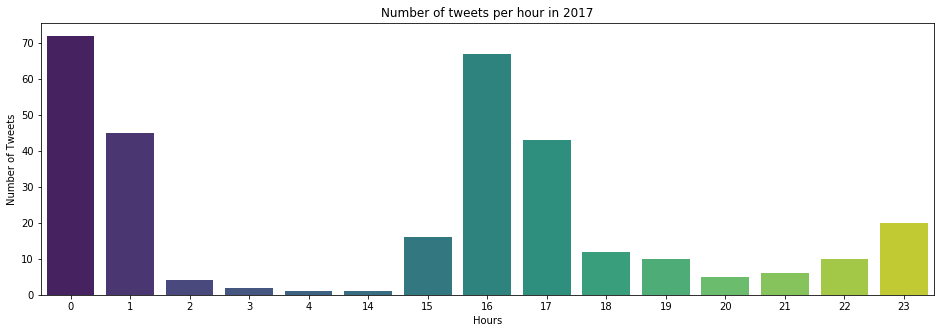

In [157]:
# Plot for tweets per hour in the year 2017
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2017"), palette = "viridis")
ax.set_title("Number of tweets per hour in 2017");
ax.set(xlabel='Hours', ylabel='Number of Tweets')

**Insights:**
- As seen in the above graphs for 2015 and 2016, the number of tweets posted are concentrated between 0:00 and 4 o' clock. This is the most active time for the account (global maximum).
- After 4 o'clock, there are very few tweets between 6:00 and 14 o' clock. In fact, there are no tweets for hours 7:00-12:00.
- The tweets do rise after 14 o'clock but it forms only the local maximum which further turns into a plateau between 18:00-22:00.
- In the year 2017, there are two peak hours between 0:00-1:00 and between 16:00-17:00. Overall the number of tweets posted are less compared to 2015 and 2016.

### 4. Which is the most common source used to post the tweets?

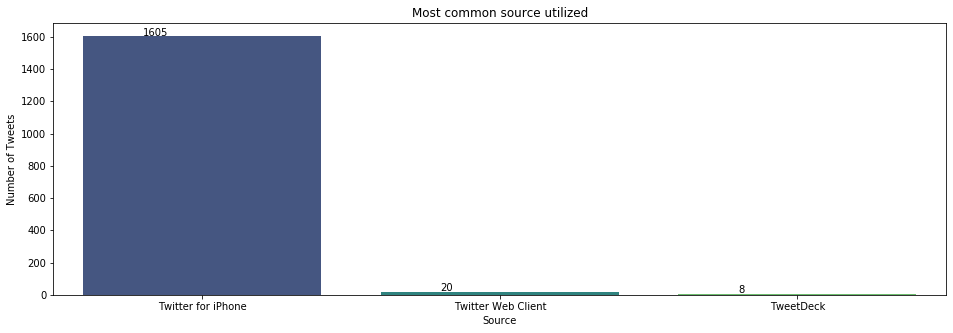

In [164]:
# Plot for Most commom source

fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "source", data = df_time, palette = "viridis")
ax.set_title("Most common source utilized");
ax.set(xlabel='Source', ylabel='Number of Tweets')

#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))


**Insights:** As we can see, the most common source utilized for posting tweets is iPhone (1605 times). The Twitter Web Client is the next with 20 counts and TwitterDeck is rarely used (only 8 times)

<a id='#conclusion'></a>
## Summary and Conclusions

- Explored the data wrangling process and further analysed the dataset to give insights about 4 questions.
- Executed all the data wrangling steps involving gathering, assessing and cleaning the dataset to augment the data analysis step.
- Gathered the data from 3 sources namely, manual download of twitter archive data, use of requests library for programmatic download of image predictions and use of Tweepy API to get additional data for the tweets
- Assessed the data both visually and programmatically to identify data quality and data tidiness issues
- Cleaned the issues based on the priority of their dimensions
- Made a clean master dataset of WeRatesDogs twitter handle

**Questions:**
1. Which breed is the most popular among WeRateDogs tweets and retweets?<br>
**Insight:** Labrador retriever. <br><br>

2. How is the account activity throughout the time period available in the dataset?<br>
**Insight:** The number of tweets per month decreased, while the retweets and favorites show an uptrend. For the image numbers there is no clear trend visible, the length of the tweets got a little bit closer to the maximum of 130 in the second half of the dataset. <br><br>

3. What are the most active hours for the twitter account?<br>
**Insight:** Here we found, that between 5 and 15 'o clock there are nearly no tweets at all. The most tweets are during the time from 0 - 4 and then from 15 - 23, but from 15 - 23 are less tweets than between 0 - 4.<br><br>

4. Which is the most common source used to post the tweets?<br>
**Insight:** Twitter iPhone is the most common source utilized by WeRateDogs account.